In [23]:
from builtins import range
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from __future__ import print_function, division
from builtins import range, input
import plotly.express as px

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
def relu(x):
  return x * (x > 0)


def error_rate(p, t):
  return np.mean(p != t)

In [15]:
data=pd.read_csv('/content/drive/MyDrive/PCA/digit-recognizer/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


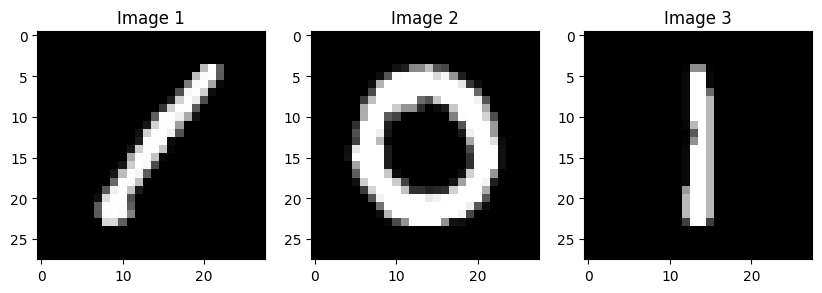

In [16]:
first_three_images_pixels = data.iloc[:3, 1:].values.reshape((3, 28, 28))  # Assuming MNIST-like data with 28x28 pixels

# Plotting the first three images
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

for i in range(3):
    axes[i].imshow(first_three_images_pixels[i], cmap='gray')  # Using a grayscale colormap
    axes[i].set_title(f'Image {i+1}')

plt.show()

In [17]:
def getKaggleMNIST():
    train = pd.read_csv('/content/drive/MyDrive/PCA/digit-recognizer/train.csv').values.astype(np.float32)
    train = shuffle(train)

    Xtrain = train[:-1000,1:] / 255
    Ytrain = train[:-1000,0].astype(np.int32)

    Xtest  = train[-1000:,1:] / 255
    Ytest  = train[-1000:,0].astype(np.int32)
    return Xtrain, Ytrain, Xtest, Ytest

In [18]:
def init_weights(shape):
    w = np.random.randn(*shape) / np.sqrt(sum(shape))
    return w.astype(np.float32)

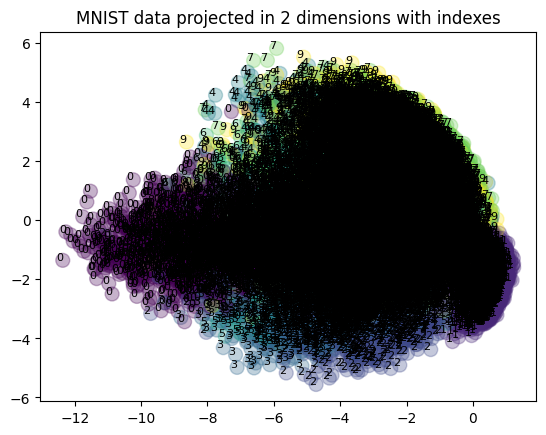

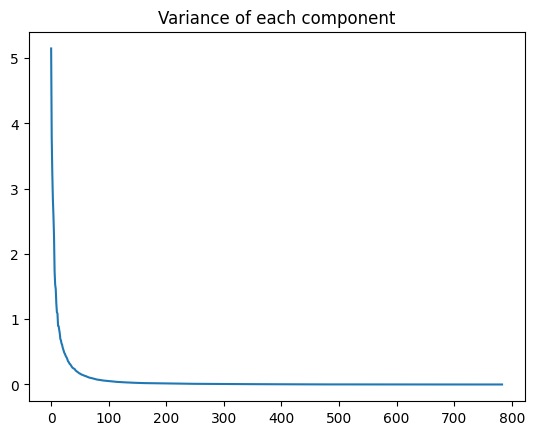

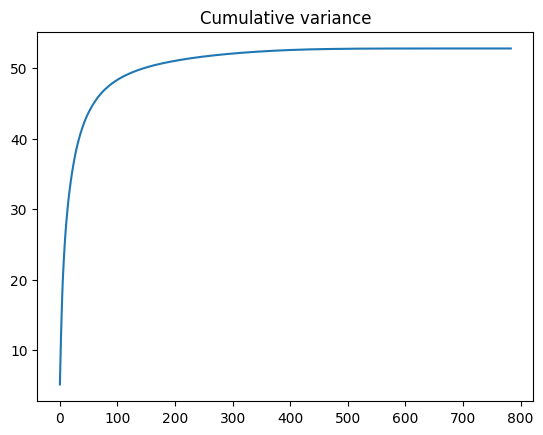

In [21]:
# Load the Kaggle MNIST dataset
Xtrain, Ytrain, Xtest, Ytest = getKaggleMNIST()

# Decompose covariance
covX = np.cov(Xtrain.T)
lambdas, Q = np.linalg.eigh(covX)

# Sort lambdas and corresponding eigenvectors
idx = np.argsort(-lambdas)
lambdas = lambdas[idx]
lambdas = np.maximum(lambdas, 0)
Q = Q[:, idx]

# Project the data onto the principal components (calculate Z)
Z = Xtrain.dot(Q)

# Plot the first 2 columns of Z with indexes
fig, ax = plt.subplots()
sc = ax.scatter(Z[:, 0], Z[:, 1], s=100, c=Ytrain, alpha=0.3)

for i, txt in enumerate(Ytrain):
    ax.annotate(txt, (Z[i, 0], Z[i, 1]), fontsize=8, ha='right')

plt.title("MNIST data projected in 2 dimensions with indexes")
plt.show()

# Plot variances
plt.plot(lambdas)
plt.title("Variance of each component")
plt.show()

# Cumulative variance
plt.plot(np.cumsum(lambdas))
plt.title("Cumulative variance")
plt.show()

In [22]:
#google collab link
#https://drive.google.com/drive/folders/1VkyaySewITLRDYJBdcyxCMSYXmWKNakq

In [24]:
#converting into 3dimenstions

Z_3d = Xtrain.dot(Q[:, :3])

# Create a DataFrame for Plotly
df_3d = pd.DataFrame({
    'PC1': Z_3d[:, 0],
    'PC2': Z_3d[:, 1],
    'PC3': Z_3d[:, 2],
    'Label': Ytrain
})

# Plot 3D visualization using Plotly
fig_3d = px.scatter_3d(df_3d, x='PC1', y='PC2', z='PC3', color='Label',
                       title='MNIST data projected in 3 dimensions (PC1, PC2, and PC3)',
                       labels={'Label': 'Digit'})
fig_3d.show()


Output hidden; open in https://colab.research.google.com to view.